In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import os

In [37]:
fake_df = pd.read_csv('data/fake.csv')
true_df = pd.read_csv('data/true.csv')

In [19]:
fake_df['label'] = 0  
true_df['label'] = 1

In [20]:
min_len = min(len(fake_df), len(true_df))
fake_df = fake_df.sample(min_len, random_state=42)
true_df = true_df.sample(min_len, random_state=42)

In [21]:
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
df['combined'] = (df['title'] + " " + df['text']).str.lower()

In [23]:
X = df['combined']
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [27]:
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4362
           1       0.98      0.99      0.99      4205

    accuracy                           0.99      8567
   macro avg       0.99      0.99      0.99      8567
weighted avg       0.99      0.99      0.99      8567

Confusion Matrix:
 [[4287   75]
 [  50 4155]]


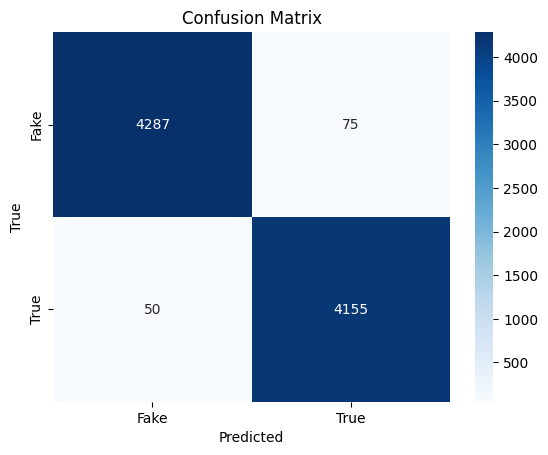

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [13]:
y_probs = model.predict_proba(X_test_tfidf)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

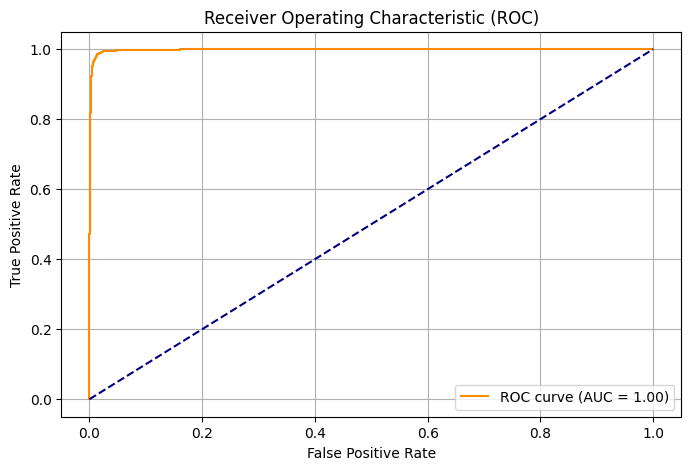

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [15]:
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9983


In [16]:
os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/logistic_model.pkl')
joblib.dump(vectorizer, 'models/vectorizer.pkl')
print("✅ Model and vectorizer saved to 'models/' directory.")

✅ Model and vectorizer saved to 'models/' directory.
